In [ ]:
import numpy as np
import pandas as pd

In [ ]:
path='/content/drive/MyDrive/project/ML/telco user/telecom_users01.csv'
dt=pd.read_csv(path)

In [ ]:
dt.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,0,0,1,1,72,1,1,0,2,2,2,2,2,2,2,0,0,24.10,1734.65,0
1,4528,9688-YGXVR,1,0,0,0,44,1,0,2,0,1,1,0,1,0,0,1,0,88.15,3973.20,0
2,6344,9286-DOJGF,1,1,1,0,38,1,1,2,0,0,0,0,0,0,0,1,1,74.95,2869.85,1
3,6739,6994-KERXL,0,0,0,0,4,1,0,1,0,0,0,0,0,1,0,1,2,55.90,238.50,0
4,432,2181-UAESM,0,0,0,0,2,1,0,1,1,0,1,0,0,0,0,0,2,53.45,119.50,0


In [ ]:
#check summary
dt.describe()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5976.000000,5986.000000
mean,3533.561310,0.490478,0.161377,0.485132,0.299198,32.468760,0.901437,0.622787,1.223187,0.717508,0.780488,0.774641,0.721183,0.816572,0.822085,0.694621,0.589375,1.574841,64.802213,2298.060617,0.265119
std,2035.705666,0.499951,0.367909,0.499821,0.457945,24.516391,0.298100,0.657360,0.777699,0.796327,0.776381,0.778469,0.795314,0.762377,0.760064,0.832884,0.491988,1.066461,30.114702,2274.127165,0.441433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1777.250000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.650000,404.312500,0.000000
50%,3546.500000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.400000,1412.150000,0.000000
75%,5291.750000,1.000000,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.900000,3846.962500,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


##Pre-Processing

In [ ]:
#remove unwanted column
dt1=dt.drop(['Unnamed: 0','customerID'], axis=1)

In [ ]:
#check NA
dt1.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [ ]:
dt1.mean()

gender                 0.490478
SeniorCitizen          0.161377
Partner                0.485132
Dependents             0.299198
tenure                32.468760
PhoneService           0.901437
MultipleLines          0.622787
InternetService        1.223187
OnlineSecurity         0.717508
OnlineBackup           0.780488
DeviceProtection       0.774641
TechSupport            0.721183
StreamingTV            0.816572
StreamingMovies        0.822085
Contract               0.694621
PaperlessBilling       0.589375
PaymentMethod          1.574841
MonthlyCharges        64.802213
TotalCharges        2298.060617
Churn                  0.265119
dtype: float64

In [ ]:
dtnull=dt1.fillna(dt1.mean())

In [ ]:
dtnull.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#check details
dtnull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   int64  
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   int64  
 3   Dependents        5986 non-null   int64  
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   int64  
 6   MultipleLines     5986 non-null   int64  
 7   InternetService   5986 non-null   int64  
 8   OnlineSecurity    5986 non-null   int64  
 9   OnlineBackup      5986 non-null   int64  
 10  DeviceProtection  5986 non-null   int64  
 11  TechSupport       5986 non-null   int64  
 12  StreamingTV       5986 non-null   int64  
 13  StreamingMovies   5986 non-null   int64  
 14  Contract          5986 non-null   int64  
 15  PaperlessBilling  5986 non-null   int64  
 16  PaymentMethod     5986 non-null   int64  


In [ ]:
dt2=dtnull.copy()

In [ ]:
#change datatype
dt2['gender']=dt2.gender.astype(bool, copy=True)
dt2['SeniorCitizen']=dt2.SeniorCitizen.astype(bool, copy=True)
dt2['Partner']=dt2.Partner.astype(bool,copy=True)
dt2['Dependents']=dt2.Dependents.astype(bool,copy=True)
dt2['PhoneService']=dt2.PhoneService.astype(bool, copy=True)
dt2['MultipleLines']=dt2.MultipleLines.astype('category', copy=True)
dt2['InternetService']=dt2.InternetService.astype('category',copy=True)
dt2['OnlineSecurity']=dt2.OnlineSecurity.astype('category', copy=True)
dt2['OnlineBackup']=dt2.OnlineBackup.astype('category', copy=True)
dt2['DeviceProtection']=dt2.DeviceProtection.astype('category',copy=True)
dt2['TechSupport']=dt2.TechSupport.astype('category', copy=True)
dt2['StreamingTV']=dt2.StreamingTV.astype('category', copy=True)
dt2['StreamingMovies']=dt2.StreamingMovies.astype('category', copy=True)
dt2['Contract']=dt2.Contract.astype('category',copy=True)
dt2['PaperlessBilling']=dt2.PaperlessBilling.astype(bool, copy=True)
dt2['PaymentMethod']=dt2.PaymentMethod.astype('category', copy=True)
dt2['Churn']=dt2.Churn.astype(bool, copy=True)

In [ ]:
dt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            5986 non-null   bool    
 1   SeniorCitizen     5986 non-null   bool    
 2   Partner           5986 non-null   bool    
 3   Dependents        5986 non-null   bool    
 4   tenure            5986 non-null   int64   
 5   PhoneService      5986 non-null   bool    
 6   MultipleLines     5986 non-null   category
 7   InternetService   5986 non-null   category
 8   OnlineSecurity    5986 non-null   category
 9   OnlineBackup      5986 non-null   category
 10  DeviceProtection  5986 non-null   category
 11  TechSupport       5986 non-null   category
 12  StreamingTV       5986 non-null   category
 13  StreamingMovies   5986 non-null   category
 14  Contract          5986 non-null   category
 15  PaperlessBilling  5986 non-null   bool    
 16  PaymentMethod     5986 n

In [ ]:
#group monthly charges into low, medium and high
bins=[0,36,90, np.inf]
name=['0','1','2']
dt2['MonthlyChargesGroup']=pd.cut(dt2.MonthlyCharges,bins,labels=name)

In [ ]:
dt2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargesGroup
0,False,False,True,True,72,True,1,0,2,2,2,2,2,2,2,False,0,24.10,1734.65,False,0
1,True,False,False,False,44,True,0,2,0,1,1,0,1,0,0,True,0,88.15,3973.20,False,1
2,True,True,True,False,38,True,1,2,0,0,0,0,0,0,0,True,1,74.95,2869.85,True,1
3,False,False,False,False,4,True,0,1,0,0,0,0,0,1,0,True,2,55.90,238.50,False,1
4,False,False,False,False,2,True,0,1,1,0,1,0,0,0,0,False,2,53.45,119.50,False,1


In [ ]:
dt2.isnull().sum()

gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
MonthlyChargesGroup    0
dtype: int64

In [ ]:
#re-group Total charges to low, medium & high

bin=[0,404,3847, np.inf]
names=['0','1','2']
dt2['TotalChargesGroup']=pd.cut(dt2.TotalCharges,bin,labels=names)

In [ ]:
dt3=dt2.copy()

In [ ]:
dt3=dt3.drop(['MonthlyCharges'], axis=1)

In [ ]:
dt3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               5986 non-null   bool    
 1   SeniorCitizen        5986 non-null   bool    
 2   Partner              5986 non-null   bool    
 3   Dependents           5986 non-null   bool    
 4   tenure               5986 non-null   int64   
 5   PhoneService         5986 non-null   bool    
 6   MultipleLines        5986 non-null   category
 7   InternetService      5986 non-null   category
 8   OnlineSecurity       5986 non-null   category
 9   OnlineBackup         5986 non-null   category
 10  DeviceProtection     5986 non-null   category
 11  TechSupport          5986 non-null   category
 12  StreamingTV          5986 non-null   category
 13  StreamingMovies      5986 non-null   category
 14  Contract             5986 non-null   category
 15  PaperlessBilling     

In [ ]:
dt3.isnull().sum()

gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
TotalCharges           0
Churn                  0
MonthlyChargesGroup    0
TotalChargesGroup      0
dtype: int64

In [ ]:
bintenure=[0,9,56, np.inf]
nametenure=['0','1','2']

dt3['TenureGroup']=pd.cut(dt3.tenure,bintenure,labels=nametenure)

In [ ]:
dt3.isnull().sum()

gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
TotalCharges            0
Churn                   0
MonthlyChargesGroup     0
TotalChargesGroup       0
TenureGroup            10
dtype: int64

In [ ]:
dt3['TenureGroup']=dt3.TenureGroup.fillna(dt3.TenureGroup.mode().iloc[0])

In [ ]:
dt3.isnull().sum()

gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
TotalCharges           0
Churn                  0
MonthlyChargesGroup    0
TotalChargesGroup      0
TenureGroup            0
dtype: int64

In [ ]:
dt4=dt3.copy()

In [ ]:
dt5=dt4.drop('tenure', axis=1)

In [ ]:
dt5.to_csv('/content/drive/MyDrive/project/ML/telco user/cleaned_telcoChurned.csv')

In [ ]:
dt5.Churn.value_counts()

False    4399
True     1587
Name: Churn, dtype: int64

##Split to train and test data

In [ ]:
from sklearn.model_selection import train_test_split
#define x and y
x=dt5.drop(['Churn','TotalCharges'], axis=1)
y=dt5.Churn

#split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=32)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4190, 19) (1796, 19) (4190,) (1796,)


In [ ]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyChargesGroup,TotalChargesGroup,TenureGroup
3217,True,False,True,False,True,1,1,1,0,1,1,1,1,2,True,1,1,2,2
513,False,False,False,False,True,0,0,2,2,2,2,2,2,1,True,3,0,0,1
5158,True,False,False,False,True,1,2,1,1,1,1,1,1,1,True,2,2,2,2
2375,True,False,False,False,True,0,1,1,1,1,1,1,0,1,False,3,1,1,1
3635,True,True,False,False,True,1,1,0,1,0,1,1,0,1,False,3,1,2,1


In [ ]:
y_train.head()

3217    False
513     False
5158    False
2375     True
3635    False
Name: Churn, dtype: bool

##Balancing dataset

In [ ]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=32)

x_train_sm,y_train_sm=smote.fit_resample(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(x_train_sm.shape,y_train_sm.shape)

(6230, 19) (6230,)


In [ ]:
print('before smote:')
print(sum(y_train==1))
print(sum(y_train==0))

print('after smote:')
print(sum(y_train_sm==1))
print(sum(y_train_sm==0))

before smote:
1075
3115
after smote:
3115
3115


In [ ]:
x_test.astype(np.int32)
y_test.astype(np.int32)

3985    0
4767    0
346     0
5477    0
2447    0
       ..
62      1
2957    0
4314    0
946     0
1300    0
Name: Churn, Length: 1796, dtype: int32

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
import statsmodels.api as sm
logmodel=LogisticRegression()
logmodel.fit(x_train_sm,y_train_sm)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
ypred=logmodel.predict(x_test)
print('Accuracy of Logistic Regression:{:.2f}'.format(logmodel.score(x_test,y_test)))

Accuracy of Logistic Regression:0.74


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,ypred)
print(cm)

[[919 365]
 [101 411]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

       False       0.90      0.72      0.80      1284
        True       0.53      0.80      0.64       512

    accuracy                           0.74      1796
   macro avg       0.72      0.76      0.72      1796
weighted avg       0.80      0.74      0.75      1796



In [ ]:
from sklearn.metrics import precision_score

print("Precision score: {:.2f}".format(precision_score(y_test,ypred)))

Precision score: 0.53


In [ ]:
from sklearn.metrics import recall_score

print("Recall score: {:.2f}".format(recall_score(y_test,ypred)))

Recall score: 0.80


In [ ]:
from sklearn.metrics import f1_score

print("F1 Score: {:.2f}".format(f1_score(y_test,ypred)))

F1 Score: 0.64


##Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#gini
clf=DecisionTreeClassifier(max_depth=5)
clf.fit(x_train_sm,y_train_sm)
ypreddt=clf.predict(x_test)

In [ ]:
print(classification_report(y_test,ypreddt))

              precision    recall  f1-score   support

       False       0.86      0.79      0.82      1284
        True       0.56      0.67      0.61       512

    accuracy                           0.76      1796
   macro avg       0.71      0.73      0.72      1796
weighted avg       0.77      0.76      0.76      1796



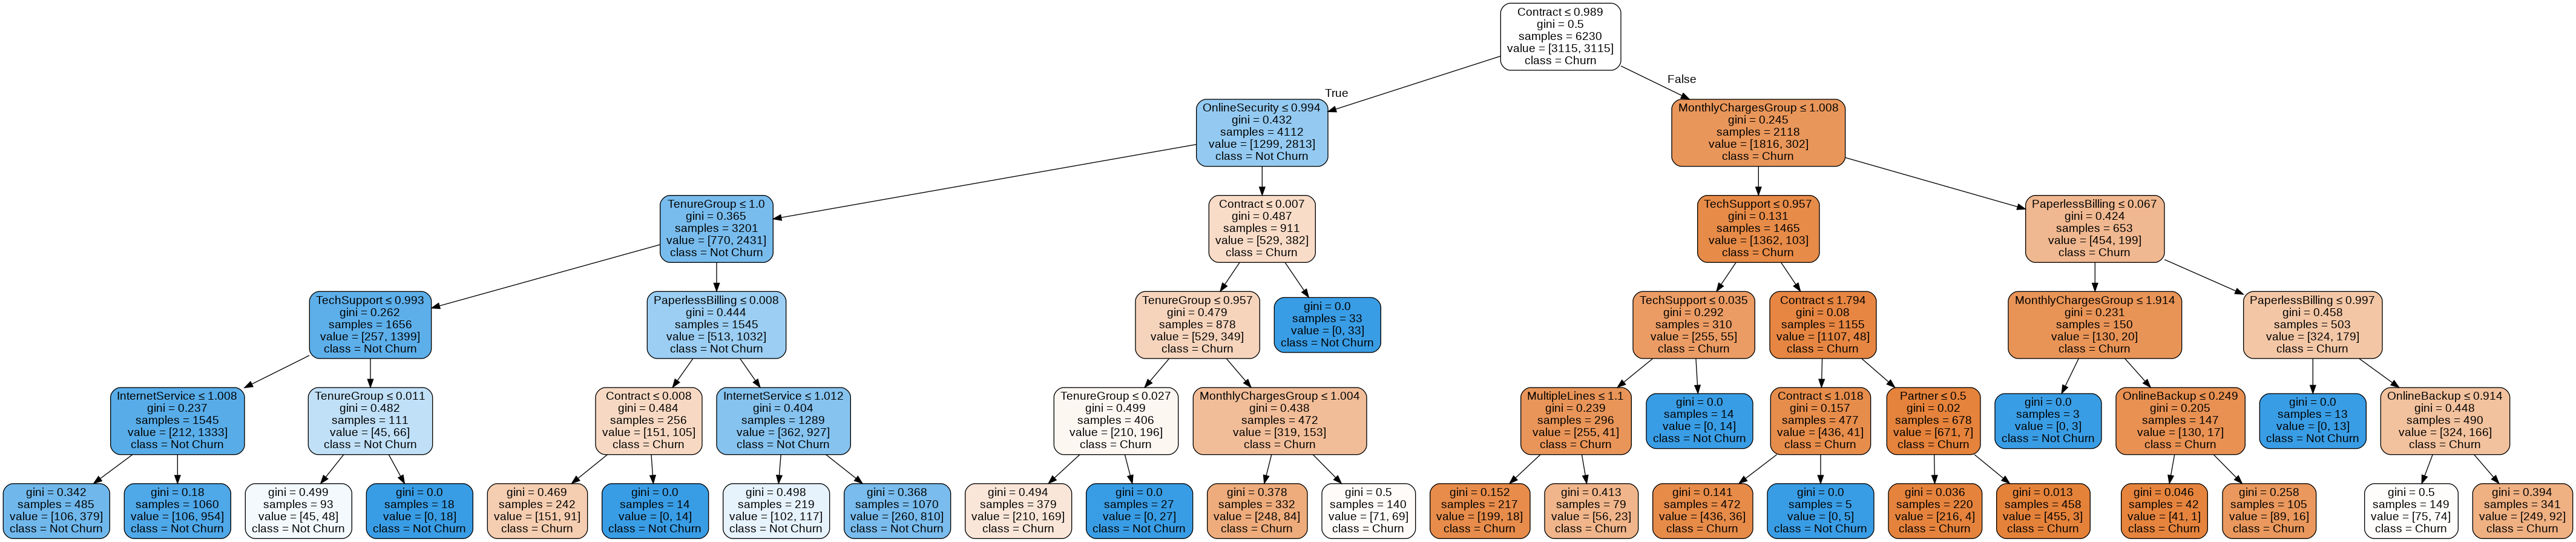

In [ ]:
#visualize the tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dotdata=StringIO()
export_graphviz(clf, out_file=dotdata,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=list(x_train.columns),class_names=['Churn','Not Churn']
                )
graph=pydotplus.graph_from_dot_data(dotdata.getvalue())
graph.write_png('telco.png')

Image(graph.create_png())

In [ ]:
clf_en=DecisionTreeClassifier(max_depth=5, criterion='entropy')
clf_en.fit(x_train_sm,y_train_sm)
ypreddt_en=clf_en.predict(x_test)

In [ ]:
print(classification_report(y_test,ypreddt_en))

              precision    recall  f1-score   support

       False       0.86      0.79      0.82      1284
        True       0.56      0.67      0.61       512

    accuracy                           0.76      1796
   macro avg       0.71      0.73      0.72      1796
weighted avg       0.77      0.76      0.76      1796



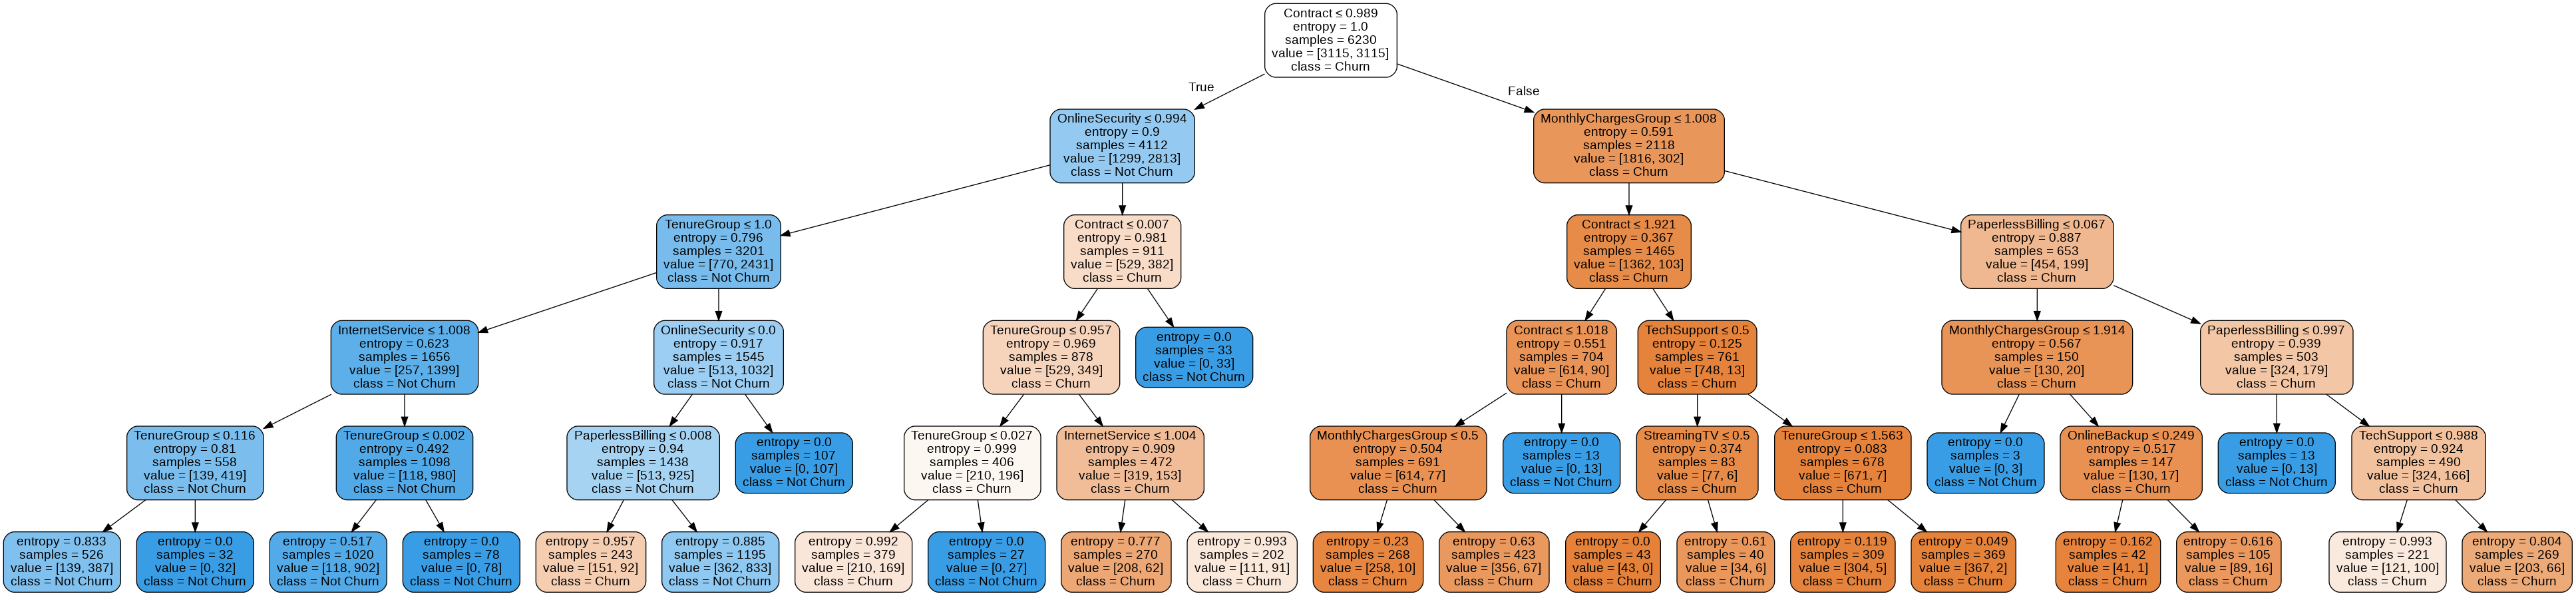

In [ ]:
dotdata=StringIO()
export_graphviz(clf_en, out_file=dotdata,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=list(x_train.columns),class_names=['Churn','Not Churn']
                )
graph=pydotplus.graph_from_dot_data(dotdata.getvalue())
graph.write_png('telco_en.png')

Image(graph.create_png())

##SVM

In [ ]:
from sklearn import svm

In [ ]:
clf_svm=svm.SVC(kernel='linear')

In [ ]:
clf_svm.fit(x_train_sm,y_train_sm)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
ypredsvm=clf_svm.predict(x_test)

In [ ]:
print(classification_report(y_test,ypredsvm))

              precision    recall  f1-score   support

       False       0.90      0.69      0.78      1284
        True       0.51      0.81      0.63       512

    accuracy                           0.73      1796
   macro avg       0.71      0.75      0.71      1796
weighted avg       0.79      0.73      0.74      1796

